# ANOMALY DETECTION WITH PYTHON USING UNSUPERVISED LEARNING TECHNIQUES

In [181]:
#import the necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,12]
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_rows",None)
pd.set_option("display.max_column",None)

In [182]:
#Load in the data 
hcp_df = pd.read_csv('Healthcare Providers.csv')

In [183]:
hcp_df.shape

(100000, 27)

In [184]:
hcp_df.head().T

,0,1,2,3,4
index,8774979,3354385,3001884,7594822,746159
National Provider Identifier,1891106191,1346202256,1306820956,1770523540,1073627758
Last Name/Organization Name of the Provider,UPADHYAYULA,JONES,DUROCHER,FULLARD,PERROTTI
First Name of the Provider,SATYASREE,WENDY,RICHARD,JASPER,ANTHONY
Middle Initial of the Provider,NaN,P,W,NaN,E
Credentials of the Provider,M.D.,M.D.,DPM,MD,DO
Gender of the Provider,F,F,M,M,M
Entity Type of the Provider,I,I,I,I,I
Street Address 1 of the Provider,1402 S GRAND BLVD,2950 VILLAGE DR,20 WASHINGTON AVE,5746 N BROADWAY ST,875 MILITARY TRL
Street Address 2 of the Provider,FDT 14TH FLOOR,NaN,STE 212,NaN,SUITE 200


In [185]:
hcp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,100000.0,4.907646e+06,2.839633e+06,2.090000e+02,2.458791e+06,4.901266e+06,7.349450e+06,9.847440e+06
National Provider Identifier,100000.0,1.498227e+09,2.874125e+08,1.003001e+09,1.245669e+09,1.497847e+09,1.740374e+09,1.993000e+09
Zip Code of the Provider,100000.0,4.163820e+08,3.082566e+08,6.010000e+02,1.426300e+08,3.633025e+08,6.819881e+08,9.990166e+08
Number of Services,100000.0,2.396714e+02,2.493187e+03,1.100000e+01,2.100000e+01,4.300000e+01,1.180000e+02,2.827390e+05
Number of Medicare Beneficiaries,100000.0,8.980931e+01,1.109617e+03,1.100000e+01,1.700000e+01,3.200000e+01,7.500000e+01,1.903060e+05
Number of Distinct Medicare Beneficiary/Per Day Services,100000.0,1.421157e+02,1.640227e+03,1.100000e+01,2.000000e+01,4.000000e+01,1.060000e+02,2.827370e+05
Average Medicare Allowed Amount,100000.0,1.014342e+02,2.572428e+02,1.000000e-02,2.427000e+01,6.509500e+01,1.131600e+02,2.049400e+04
Average Submitted Charge Amount,100000.0,3.545505e+02,1.062608e+03,1.000000e-02,5.764788e+01,1.460000e+02,2.989321e+02,6.269400e+04
Average Medicare Payment Amount,100000.0,7.735880e+01,1.997188e+02,8.679245e-03,1.933523e+01,4.702018e+01,8.489445e+01,1.606730e+04
Average Medicare Standardized Amount,100000.0,7.803069e+01,2.000455e+02,8.679245e-03,2.012185e+01,4.784109e+01,8.487956e+01,1.695715e+04


In [186]:
hcp_df.isnull().sum()/len(hcp_df)*100

index                                                        0.000
National Provider Identifier                                 0.000
Last Name/Organization Name of the Provider                  0.000
First Name of the Provider                                   4.255
Middle Initial of the Provider                              29.331
Credentials of the Provider                                  7.209
Gender of the Provider                                       4.254
Entity Type of the Provider                                  0.000
Street Address 1 of the Provider                             0.000
Street Address 2 of the Provider                            59.363
City of the Provider                                         0.000
Zip Code of the Provider                                     0.000
State Code of the Provider                                   0.000
Country Code of the Provider                                 0.000
Provider Type                                                0

In [187]:
#List the column names
for i,v in enumerate(hcp_df.columns):
    print(i,v)

0 index
1 National Provider Identifier
2 Last Name/Organization Name of the Provider
3 First Name of the Provider
4 Middle Initial of the Provider
5 Credentials of the Provider
6 Gender of the Provider
7 Entity Type of the Provider
8 Street Address 1 of the Provider
9 Street Address 2 of the Provider
10 City of the Provider
11 Zip Code of the Provider
12 State Code of the Provider
13 Country Code of the Provider
14 Provider Type
15 Medicare Participation Indicator
16 Place of Service
17 HCPCS Code
18 HCPCS Description
19 HCPCS Drug Indicator
20 Number of Services
21 Number of Medicare Beneficiaries
22 Number of Distinct Medicare Beneficiary/Per Day Services
23 Average Medicare Allowed Amount
24 Average Submitted Charge Amount
25 Average Medicare Payment Amount
26 Average Medicare Standardized Amount


## SOME DATA PREPROCESSING

In [95]:
#Drop unnecesary
df= hcp_df.drop(["index","National Provider Identifier","Last Name/Organization Name of the Provider","First Name of the Provider","Middle Initial of the Provider","Credentials of the Provider","Gender of the Provider","Entity Type of the Provider","Street Address 1 of the Provider","Street Address 2 of the Provider","City of the Provider","Zip Code of the Provider","State Code of the Provider","Country Code of the Provider","Provider Type","Medicare Participation Indicator","Place of Service","HCPCS Code","HCPCS Description","HCPCS Drug Indicator"],axis=1)

In [188]:
df.head().T

,0,1,2,3,4
Number of Services,27.000000,175.000000,32.000000,20.00,33.000000
Number of Medicare Beneficiaries,24.000000,175.000000,13.000000,18.00,24.000000
Number of Distinct Medicare Beneficiary/Per Day Services,27.000000,175.000000,32.000000,20.00,31.000000
Average Medicare Allowed Amount,200.587778,123.730000,90.650000,3.50,26.520000
Average Submitted Charge Amount,305.211111,548.800000,155.000000,5.00,40.000000
Average Medicare Payment Amount,157.262222,118.830000,64.439688,3.43,19.539394
Average Medicare Standardized Amount,160.908889,135.315257,60.595937,3.43,19.057576


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Number of Services                                        100000 non-null  float64
 1   Number of Medicare Beneficiaries                          100000 non-null  int64  
 2   Number of Distinct Medicare Beneficiary/Per Day Services  100000 non-null  int64  
 3   Average Medicare Allowed Amount                           100000 non-null  float64
 4   Average Submitted Charge Amount                           100000 non-null  float64
 5   Average Medicare Payment Amount                           100000 non-null  float64
 6   Average Medicare Standardized Amount                      100000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 5.3 MB


## PERFORM THE ANOMALY DETECTION USING ISOLATION FOREST ALGORITHM

In [190]:
iforest= IsolationForest(n_estimators=100,contamination=0.05, random_state=123)

In [191]:
#Return 1 for inliers, -1 for outliers
pred= iforest.fit_predict(df)

In [192]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [193]:
#Extract the outliers
outlier_index= np.where(pred==-1)
outlier_values= df.iloc[outlier_index]

In [194]:

outlier_values

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
72,42.0,40,42,667.010000,5421.000000,517.969286,515.000000
120,15000.0,12,20,1.060300,3.900000,0.829990,0.829990
122,31.0,31,31,1529.400000,8700.000000,1522.478065,1071.254194
175,17.0,17,17,999.848235,2144.000000,727.914706,746.780000
195,713.0,92,713,279.720000,709.245442,206.578205,221.713268
221,13.0,13,13,1686.694615,6785.660000,1230.850769,1430.163077
223,18.0,18,18,767.871111,2350.000000,594.039444,513.150000
255,101.0,100,101,449.670000,1200.000000,344.127228,387.453267
263,49.0,39,39,509.439388,1931.000000,392.317959,433.624490
317,487.0,480,487,170.630000,788.869610,124.901540,129.105195


In [195]:
##Feature Scaling
sc= StandardScaler()
df_scaled= sc.fit_transform(df)
outlier_values_scaled=sc.transform(outlier_values)

In [196]:
#Reduce dimensionality using PCA
pca= PCA(n_components= 2)
df_pca= pca.fit_transform(df_scaled)
outlier_values_pca=pca.fit_transform(outlier_values_scaled) #We reduce the dimensionality using PCA fot the purpose of visualization.

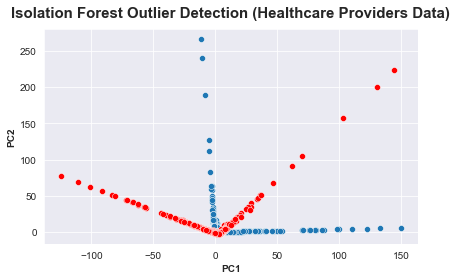

In [197]:
#Plot the data
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1])
sns.scatterplot(x=outlier_values_pca[:,0],y=outlier_values_pca[:,1],color='r')
plt.title("Isolation Forest Outlier Detection (Healthcare Providers Data)", fontsize=15,  pad= 12,fontweight='bold')
plt.xlabel("PC1",fontweight='bold')
plt.ylabel("PC2",fontweight='bold')
plt.tight_layout()
plt.savefig("Isolation Forest Detection.png",dpi= 200)


## LOCAL OUTLIER FACTOR ALGORITHM

In [198]:
lofneigh= NearestNeighbors(n_neighbors=3,algorithm= "ball_tree",p=1)

In [199]:
#make a copy of the data
df1= df.copy()

In [200]:
pred= lofneigh.fit(df1)

In [201]:
pred

NearestNeighbors(algorithm='ball_tree', n_neighbors=3, p=1)

In [202]:
#Extract outliers
outlier_index= np.where(pred==-1)
outlier_values= df1.iloc[outlier_index]

In [207]:
#outlier_values

## ELLIPTIC ENVELOPE ALGORITHM

In [144]:
elpenv= EllipticEnvelope(contamination=0.05, random_state=234)

In [208]:
df2=df.copy

In [145]:
pred= elpenv.fit_predict(df2)

In [146]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [204]:
#Extract outliers
outlier_index= np.where(pred==-1)
outlier_values= df1.iloc[outlier_index]

In [206]:
#outlier_values